<a href="https://colab.research.google.com/github/syamkakarla98/Hyperspectral_Image_Analysis_Simplified/blob/master/Articles/Hyperspectral_Image_Analysis%E2%80%8A_%E2%80%8AClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indian Pines Satellite Image Analysis - Classification

You can use this notebook to write the ML pipeline for the classification of Indian pines based on the analysis of satellite images or you can create a folder with different files associated to the different steps of the ML pipeline.

## Import Libraries

In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#import Random forest classifiers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

## Download HSI Data

In [2]:
!ls

Data_satellite	Indian_pines_classification.ipynb  README.md


## Read the Data

In [21]:
from scipy.io import loadmat

def read_HSI():
  X = loadmat('Data_satellite/Indian_pines_corrected.mat')['indian_pines_corrected']
  y = loadmat('Data_satellite/Indian_pines_gt.mat')['indian_pines_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (145, 145, 200)
y shape: (145, 145)


In [26]:
X

array([[[3172, 4142, 4506, ..., 1057, 1020, 1020],
        [2580, 4266, 4502, ..., 1064, 1029, 1020],
        [3687, 4266, 4421, ..., 1061, 1030, 1016],
        ...,
        [2570, 3890, 4320, ..., 1042, 1021, 1015],
        [3170, 4130, 4320, ..., 1054, 1024, 1020],
        [3172, 3890, 4316, ..., 1043, 1034, 1016]],

       [[2576, 4388, 4334, ..., 1047, 1030, 1006],
        [2747, 4264, 4592, ..., 1055, 1039, 1015],
        [2750, 4268, 4423, ..., 1047, 1026, 1015],
        ...,
        [3859, 4512, 4605, ..., 1056, 1035, 1015],
        [3686, 4264, 4690, ..., 1051, 1012, 1020],
        [2744, 4268, 4597, ..., 1047, 1019, 1016]],

       [[2744, 4146, 4416, ..., 1055, 1029, 1025],
        [2576, 4389, 4416, ..., 1051, 1021, 1011],
        [2744, 4273, 4420, ..., 1068, 1033, 1010],
        ...,
        [2570, 4266, 4509, ..., 1051, 1025, 1010],
        [2576, 4262, 4496, ..., 1047, 1029, 1020],
        [2742, 4142, 4230, ..., 1042, 1025, 1011]],

       ...,

       [[3324, 3728, 400

Explained Variance Ratio: [0.6861814  0.19194106 0.0256119  0.01686552 0.01049086 0.00840367
 0.00470794 0.00392647 0.00372137 0.00346936 0.00284681 0.00245588
 0.00214139 0.00197503 0.00185902 0.00180064 0.00174183 0.00157985
 0.00154051 0.00149914]


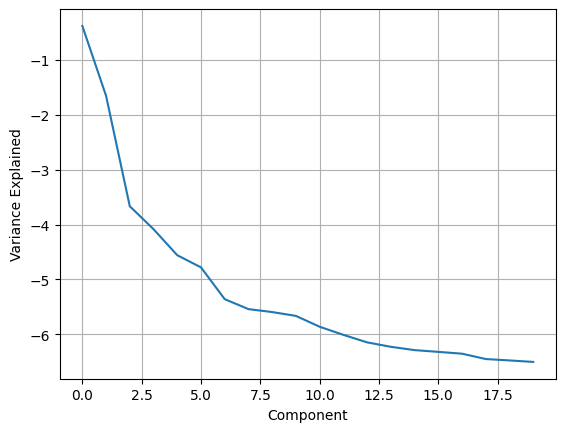

Cumulative Explained Variance:
PC1: 0.6861814043981018
PC2: 0.878122459597216
PC3: 0.9037343598379057
PC4: 0.9205998778897515
PC5: 0.9310907334099787
PC6: 0.9394944070305812
PC7: 0.9442023475326745
PC8: 0.9481288185668396
PC9: 0.9518501928255412
PC10: 0.9553195506189771
PC11: 0.9581663624953467
PC12: 0.9606222408524108
PC13: 0.9627636269365146
PC14: 0.9647386528137539
PC15: 0.9665976698633273
PC16: 0.9683983077391831
PC17: 0.9701401385587356
PC18: 0.9717199883461485
PC19: 0.9732605005703675
PC20: 0.9747596402177452


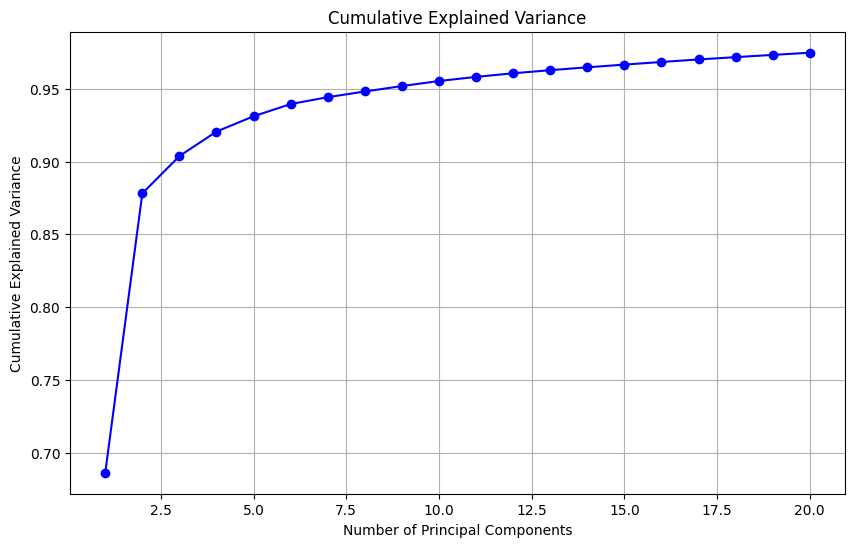

In [38]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# y represent the label or specie of the pine tree(target)

def f_PCA(X, n_components=200):
    # Reshape the data to 2D array (pixel values as features, using bands as samples)
    X_reshaped = X.reshape((-1, X.shape[2]))

    # Standardize the data
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X_reshaped)

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_std)

    # Print the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    print("Explained Variance Ratio:", explained_variance_ratio)
    
    # Visualize the explained variance ratio
    plt.plot(np.log(explained_variance_ratio))
    plt.grid()
    plt.xlabel('Component')
    plt.ylabel('Variance Explained')
    plt.show()

    # Calculate cumulative explained variance
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    # Print cumulative explained variance
    print("Cumulative Explained Variance:")
    for i in range(n_components):
        print(f"PC{i + 1}: {cumulative_variance_ratio[i]}")

    # Visualize the cumulative explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
    plt.title('Cumulative Explained Variance')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()

    return X_pca

# Perform the PCA on 10 components, print the explained variance ratio, and visualize it 
X_pca = f_PCA(X, n_components=20)


# # Visualize n pcs
# # flatten the X_pca matrix
# n_components=2
# plt.figure(figsize=(15, 10))
# for i in range(n_components):
#     plt.subplot(2, 5, i + 1)
#     plt.scatter(X_pca[:, i], range(len(X_pca)), c=y.flatten(), cmap='rainbow')
#     plt.title(f'Principal Component {i + 1}')
#     plt.xlabel(f'PC {i + 1}')
#     plt.ylabel('Sample Index')

# plt.tight_layout()
# plt.show()



### Visualize Bands

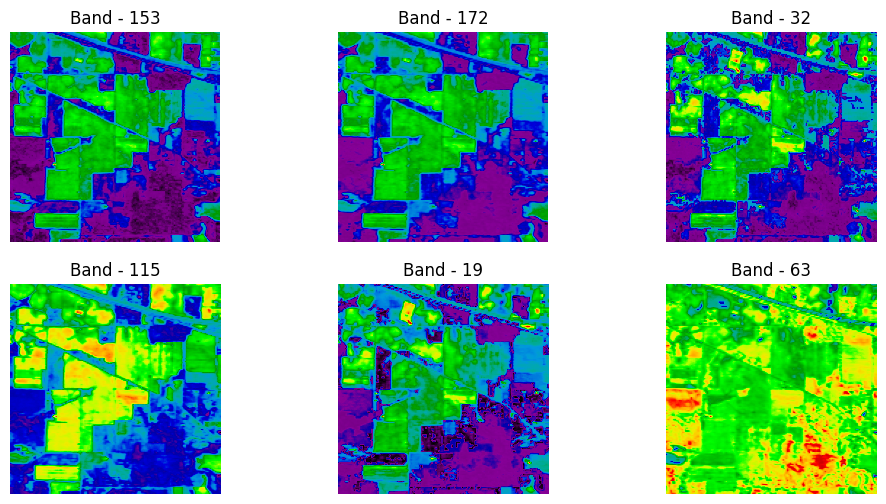

In [14]:
fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')
plt.savefig('IP_Bands.png')

### Visualize the Ground Truth

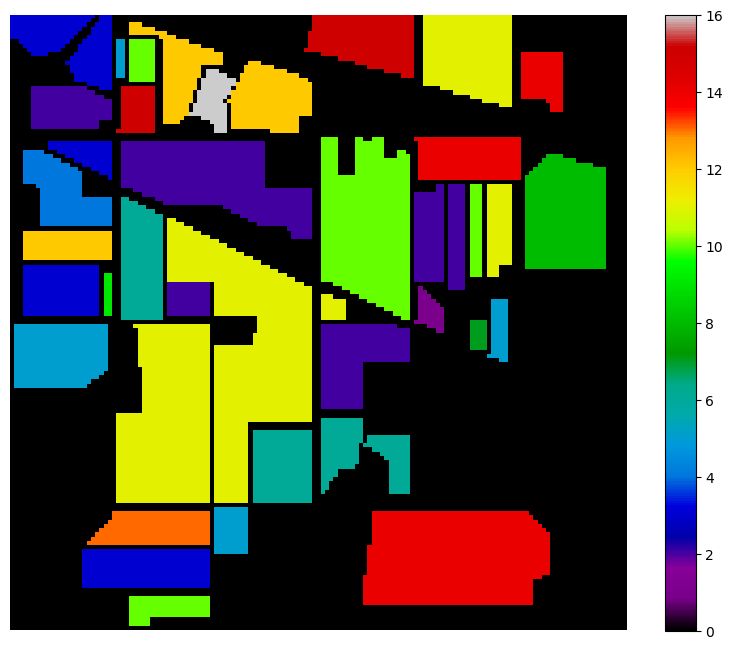

In [6]:
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_GT.png')
plt.show()

## Convert the dataset into csv 

In [7]:
import pandas as pd
import numpy as np

def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df
  
df = extract_pixels(X, y)


# EDA 

Perform exploratory data analysis on the tabular data

## Principal Component Analysis(PCA)


STEPS

1. Estimate the basis of Principal components

2. Plot the cumulative explained variance associated with Principal components VS Number of components.

3. Select acordingly the no.of components for PCA projection

4. Reconstruct the images associated to the different bands using the selected principal components

## Plot reconstructed images in different bands

In [2]:
#fig = plt.figure(figsize = (20, 10))



#plt.savefig('IP_PCA_Bands.png')

In [15]:
# saving to .csv
q.to_csv('IP_40_PCA.csv', index=False)

## Classification with RF (optional: comparison with other classifiers)

In [99]:
#Use the names below for the classes sorted


names = ['Alfalfa','Corn-notill', 'Corn-mintill','Corn','Grass-pasture','Grass-trees',
'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
'Soybean-clean', 'Wheat','Woods','Buildings Grass Trees Drives','Stone Steel Towers']


#SPLIT DATA in TRAINING and testing

#Define classifier

#Fit and predict
#ypred = classifier.predict(X_test)

In [3]:
#PLOT THE CONFUSION MATRIX Associate to the classifier

#data = confusion_matrix(y_test, ypred)
#df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
#plt.savefig('cmap.png', dpi=300)

In [1]:
#print(classification_report(y_test, ypred, target_names = names))

## Classification Map

In [4]:
#Use the function below to produce the classification map


def reconstruct_classification_map(q, classifier):
    l=[]
    for i in range(q.shape[0]):
      if q.iloc[i, -1] == 0:
        l.append(0)
      else:
        l.append(classifier.predict(q.iloc[i, :-1].values.reshape(1, -1)))
    return l


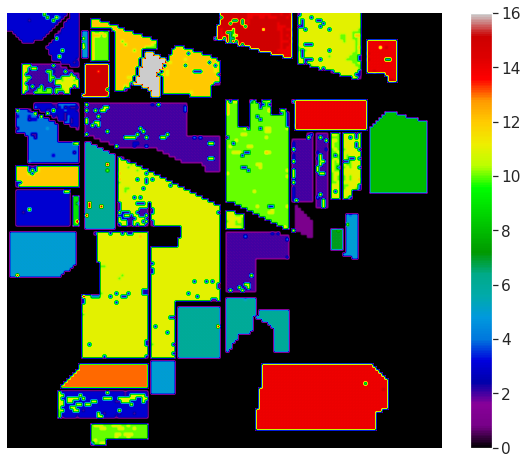

In [129]:
clmap = np.array(l).reshape(145, 145).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap.png')
plt.show()



---



---

